# Descriptive Statistics Problems

## Exercise 1 – How long are movie titles?

In this exercise, you will apply descriptive statistics techniques to a real dataset: a database of 1000 popular movies from the IMDb website.

From the title of each movie, you will:
- Calculate the title length (in characters).
- Obtain key statistical metrics: mean, median, mode, range, variance, standard deviation, skewness, and kurtosis.
- Identify the longest and shortest titles.
- Visualize the distribution of these lengths with a histogram and a density curve.


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode

# Load IMDb dataset
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [4]:
# Create a new column called 'title_length' with the length (number of characters) of each title
df['title_length'] = df['title'].str.len()
df[['title', 'title_length']].head()

,title,title_length
0,The Shawshank Redemption,24
1,The Godfather,13
2,The Godfather: Part II,22
3,The Dark Knight,15
4,Pulp Fiction,12


In [5]:
# Calculate mean, median, and mode of the 'title_length' column
mean_length = df['title_length'].mean()
median_length = df['title_length'].median()
mode_result = df['title_length'].mode()

if len(mode_result) > 0:
    mode_length = mode_result[0]
else:
    mode_length = None

print(f"Mean title length: {mean_length}")
print(f"Median title length: {median_length}")
print(f"Mode title length: {mode_length}")


Mean title length: 15.481103166496425
Median title length: 14.0
Mode title length: 12


In [6]:
# Calculate the range, variance, and standard deviation of 'title_length'
range_length = df['title_length'].max() - df['title_length'].min()
variance_length = df['title_length'].var()
std_length = df['title_length'].std()

print(f"Range of title length: {range_length}")
print(f"Variance of title length: {variance_length}")
print(f"Standard deviation of title length: {std_length}")

Range of title length: 67
Variance of title length: 72.1067488840288
Standard deviation of title length: 8.491569282766807


In [7]:
# Calculate skewness and kurtosis of the 'title_length' column
skewness = df['title_length'].skew()
kurtosis = df['title_length'].kurtosis()

print(f"Skewness of title length: {skewness}")
print(f"Kurtosis of title length: {kurtosis}")

Skewness of title length: 1.5252523464631278
Kurtosis of title length: 3.8122887061291544


In [8]:
# Print the shortest and longest title based on their length
shortest_title = df.loc[df['title_length'].idxmin(), 'title']
longest_title = df.loc[df['title_length'].idxmax(), 'title']

print(f"Shortest title: '{shortest_title}' ({df['title_length'].min()} characters)")
print(f"Longest title: '{longest_title}' ({df['title_length'].max()} characters)")

Shortest title: 'M' (1 characters)
Longest title: 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb' (68 characters)


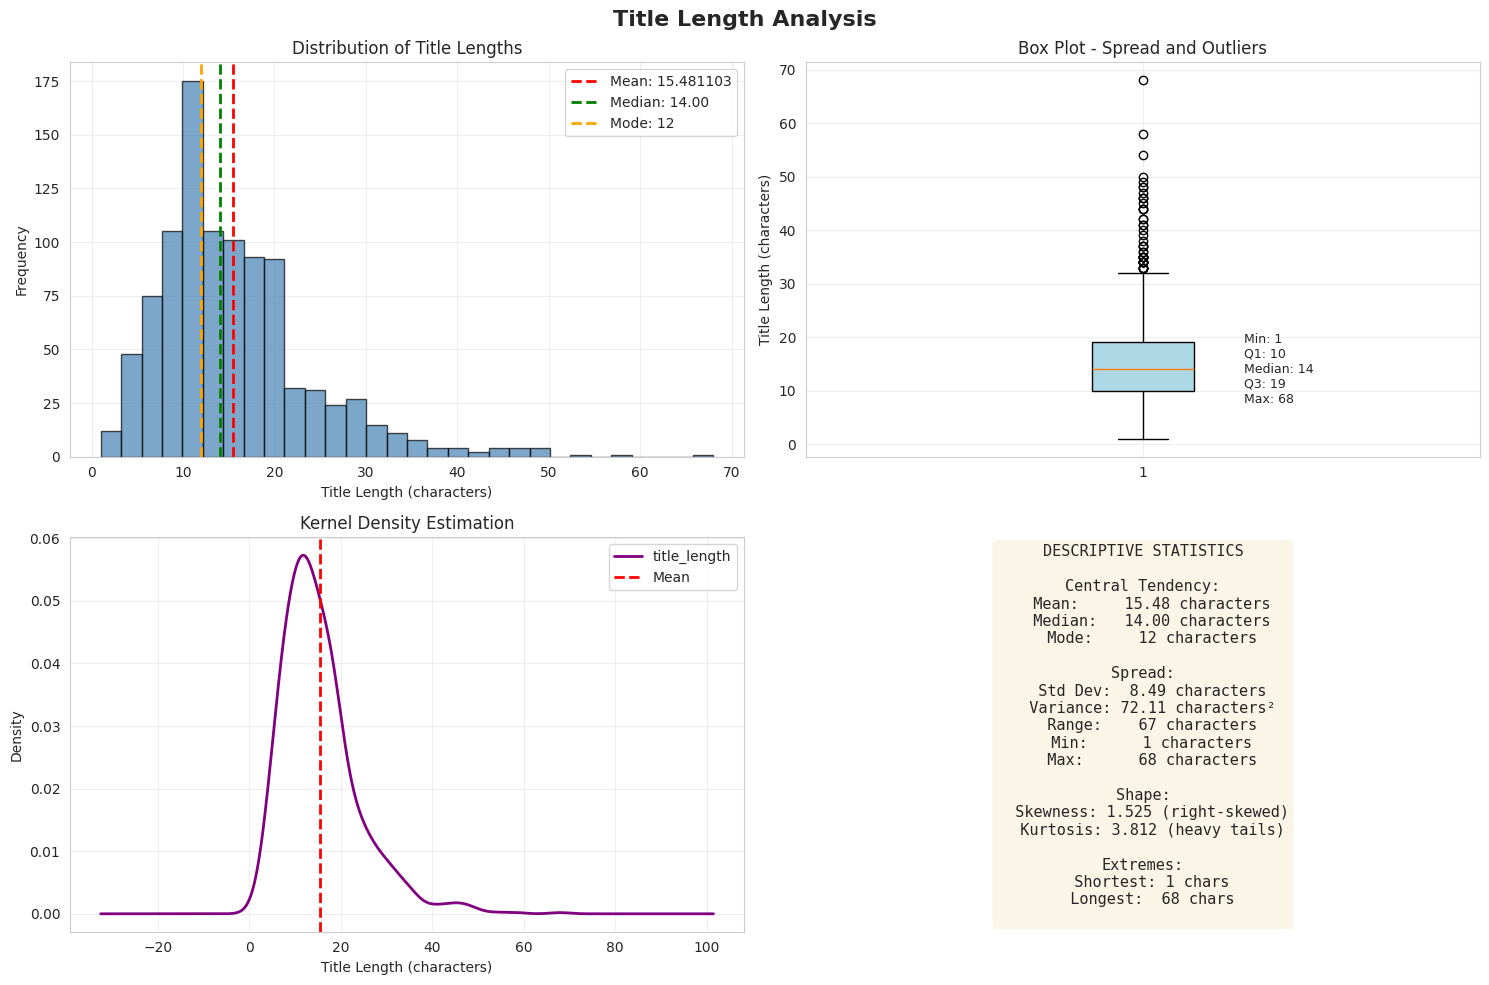

In [9]:
# plot your results
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Title Length Analysis', fontsize=16, fontweight='bold')

ax1 = axes[0, 0]
ax1.hist(df['title_length'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(df['title_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["title_length"].mean():2f}')
ax1.axvline(df['title_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["title_length"].median():.2f}')
ax1.axvline(df['title_length'].mode()[0], color='orange', linestyle='--', linewidth=2, label=f'Mode: {df["title_length"].mode()[0]:.0f}')
ax1.set_xlabel('Title Length (characters)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Title Lengths')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
box = ax2.boxplot(df['title_length'], vert=True, patch_artist=True)
box['boxes'][0].set_facecolor('lightblue')
ax2.set_ylabel('Title Length (characters)')
ax2.set_title('Box Plot - Spread and Outliers')
ax2.grid(True, alpha=0.3)
stats_text = f"Min: {df['title_length'].min():.0f}\n"
stats_text += f"Q1: {df['title_length'].quantile(0.25):.0f}\n"
stats_text += f"Median: {df['title_length'].median():.0f}\n"
stats_text += f"Q3: {df['title_length'].quantile(0.75):.0f}\n"
stats_text += f"Max: {df['title_length'].max():.0f}"
ax2.text(1.15, df['title_length'].median(), stats_text, fontsize=9, verticalalignment='center')

ax3 = axes[1, 0]
df['title_length'].plot(kind='density', ax=ax3, color='purple', linewidth=2)
ax3.axvline(df['title_length'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax3.set_xlabel('Title Length (characters)')
ax3.set_ylabel('Density')
ax3.set_title('Kernel Density Estimation')
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
ax4.axis('off')
mean_val = df['title_length'].mean()
median_val = df['title_length'].median()
mode_val = df['title_length'].mode()[0]
std_val = df['title_length'].std()
var_val = df['title_length'].var()
range_val = df['title_length'].max() - df['title_length'].min()
skew_val = df['title_length'].skew()
kurt_val = df['title_length'].kurtosis()
summary_text = f"""DESCRIPTIVE STATISTICS

Central Tendency:
  Mean:     {mean_val:.2f} characters
  Median:   {median_val:.2f} characters
  Mode:     {mode_val:.0f} characters

Spread:
  Std Dev:  {std_val:.2f} characters
  Variance: {var_val:.2f} characters²
  Range:    {range_val:.0f} characters
  Min:      {df['title_length'].min():.0f} characters
  Max:      {df['title_length'].max():.0f} characters

Shape:
  Skewness: {skew_val:.3f} {'(right-skewed)' if skew_val > 0.5 else '(left-skewed)' if skew_val < -0.5 else '(symmetric)'}
  Kurtosis: {kurt_val:.3f} {'(heavy tails)' if kurt_val > 2 else '(light tails)' if kurt_val < -2 else '(normal)'}

Extremes:
  Shortest: {df['title_length'].min():.0f} chars
  Longest:  {df['title_length'].max():.0f} chars
"""
ax4.text(0.5, 0.5, summary_text, 
         fontsize=11, 
         verticalalignment='center',
         horizontalalignment='center',
         family='monospace', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3),
         transform=ax4.transAxes)  # <-- This tells it to use axis coordinates (0-1)

plt.tight_layout()
plt.show()


---

## Exercise 2 – Manual Calculation of Standard Deviation

In this exercise, you will manually calculate the standard deviation by selecting five actual titles from the movie dataset you loaded earlier.


In [10]:
# Create a list with 5 actual values from df['title_length'], for example: [10, 13, 14, 18, 22]

sample_lengths = df['title_length'].head(5).tolist()
print(sample_lengths)


[24, 13, 22, 15, 12]


In [14]:
# Calculate the mean of the 5 values
mean_sample = sum(sample_lengths) / len(sample_lengths)
print(f"Mean of sample: {mean_sample}")

Mean of sample: 17.2


In [16]:
# Calculate the squared differences with respect to the mean
squared_diffs = [(x-mean_sample)** 2 for x in sample_lengths]
print(f"Mean of sample: {mean_sample}")
print(f"Original values: {sample_lengths}")
print(f"Squared differences: {squared_diffs}")
      

Mean of sample: 17.2
Original values: [24, 13, 22, 15, 12]
Squared differences: [46.24000000000001, 17.639999999999993, 23.040000000000006, 4.839999999999997, 27.039999999999992]


In [17]:
# Calculate the variance (average of the squared differences) and its square root to obtain the standard deviation
import math

variance = sum(squared_diffs) / (len(sample_lengths) - 1)
std_dev = math.sqrt(variance)

print(f"Squared differences: {squared_diffs}")
print(f"Sum of squared differences: {sum(squared_diffs)}")
print(f"Number of values (n): {len(sample_lengths)}")
print(f"Variance (using n-1): {variance}")
print(f"Standard deviation: {std_dev}")


Squared differences: [46.24000000000001, 17.639999999999993, 23.040000000000006, 4.839999999999997, 27.039999999999992]
Sum of squared differences: 118.80000000000001
Number of values (n): 5
Variance (using n-1): 29.700000000000003
Standard deviation: 5.449770637375485
